# Preliminaries

We download the data:

In [27]:
# !wget https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/65de5908dccf120762b305238e02610a8c18a3f9/titanic_train.csv

import requests

url = "https://gitlab.com/andras.simonyi/10_days_AI_training_data/raw/65de5908dccf120762b305238e02610a8c18a3f9/titanic_train.csv"
filename = "titanic_train.csv"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open the file in binary write mode and write the content
    with open(filename, 'wb') as f:
        f.write(response.content)
    print("Download complete!")
else:
    print("Failed to download the file. Status code:", response.status_code)


Download complete!


# Trying it out -- on the Titanic data set

Short description of the data set:

> The titanic [...] data frames describe the survival status of individual passengers on the Titanic.

> Non-obvious variables:

>- Pclass -- Passenger Class  (1 = 1st; 2 = 2nd; 3 = 3rd)
>- Survived -- Survival  (0 = No; 1 = Yes)
>- SibSp -- Number of Siblings/Spouses Aboard
>- Parch -- Number of Parents/Children Aboard
>- Fare (ticket price in British pound)
>- Embarked -- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [28]:
import pandas as pd

df = pd.read_csv("titanic_train.csv")

For the sake of simplicity, we divide our data only into a training and a validation part:

In [29]:
print("shape:", df.shape)

shape: (891, 12)


## Inspecting and cleaning the data

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on our inspection, we drop the Cabin, Ticket, PassengerId, Name and index columns, since they are unusable for the prediction task:

In [33]:
columns_to_drop = ["Cabin", "Ticket", "PassengerId", "Name"]
df = df.drop(columns=columns_to_drop)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


We encode the the gender of passenger by numbers, and, as a primitive form of data imputation, replace missing age values with the mean age in the training data:

In [34]:
import numpy as np
age_mean = df.Age.mean()
replacements = {"Sex": {"male": 1, "female":0}, "Age": {np.NaN: age_mean}}
df.replace(replacements, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


We drop the remaining rows with missing data:

In [35]:
print("Length before dropping:", len(df))
df.dropna(inplace=True)
df.reset_index()
print("Length after dropping:", len(df))

Length before dropping: 891
Length after dropping: 889


Finally, we one-hot encode the Embarked column.

In [36]:
df = pd.get_dummies(df)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


For the sake of simplicity, we divide our data only into a training and a validation part:

In [37]:
from sklearn.model_selection import train_test_split

df_train, df_valid = train_test_split(df, test_size=0.1)

print("train shape:", df_train.shape)
print("validation shape:", df_valid.shape)

X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]

X_test = df_valid.drop("Survived", axis=1)
Y_test = df_valid["Survived"]

train shape: (800, 10)
validation shape: (89, 10)


# A simple neural network: Perceptron

![Perceptron](https://miro.medium.com/max/640/1*_Epn1FopggsgvwgyDA4o8w.png)

*Note*: it should be $x_{1}, x_{2}, x_{3}, x_{4}$ in the figure above.

We can visually understand the Perceptron by looking at the above image. For every training example, we first take the dot product of input features and weights, **w**. Then, we apply the Unit Step Function to make the prediction $\hat{y}$.

And if the prediction is wrong or in other words the model has misclassified that example, we make the update for the parameters **w** and **b** (bias):

<center>
$Δw = lr\cdot(y_{i}-\hat{y}_{i})$

$w \leftarrow w + Δw \cdot x_{i}$

$b \leftarrow b + Δw$
</center>

We don’t update when the prediction is correct (or the same as the true/target value y).

We create a Perceptron class, which implement single layer neural network with a `fit` and a `predict` method:
+ The `predict` method returns a vector of predictions for an array of samples, while
+ the `fit` method initializes the model parameters and trains the model using the perceptron learning rule.

In [54]:
import numpy as np

class Perceptron:
    def step_func(self, z):
        return np.where(z >= 0, 1, 0)

    def fit(self, X, y, rate=0.001, epoch=500):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        n_samples, n_features = X.shape

        # weights
        self.weight = np.zeros(n_features)
        self.bias = 0

        for e in range(epoch):
            n_miss = 0 # Number of misclassifications

            # Random shuffle
            perm = np.random.permutation(n_samples)

            for xi, target in zip(X[perm], y[perm]):
                # Calculate y_hat
                y_hat = self.step_func(np.dot(xi, self.weight) + self.bias)

                # Calculate delta W if target != y_hat (misclassifications)
                delta_w = rate * (target - y_hat) * xi

                # Convert delta_w to the same data type as self.weight
                delta_w = delta_w.astype(self.weight.dtype)

                # Update weight and bias if misclassifications
                if target != y_hat:
                    self.weight += delta_w
                    self.bias += rate * (target - y_hat)

                    # Increase misclassifications number if applied
                    n_miss += 1

            # Print the loss
            if e % 50 == 0:
                print("Epoch", e, "- Wrong prediction:", n_miss)

        print("Finished training. Lost:", n_miss)

    def predict(self, X):
        """Return class label after unit step"""
        return self.step_func(np.dot(X, self.weight) + self.bias)


## Fitting a network

In [59]:
p = Perceptron()
p.fit(X_train.to_numpy(), Y_train.to_numpy(), 0.001, 500)

Epoch 0 - Wrong prediction: 320
Epoch 50 - Wrong prediction: 273
Epoch 100 - Wrong prediction: 250
Epoch 150 - Wrong prediction: 243
Epoch 200 - Wrong prediction: 219
Epoch 250 - Wrong prediction: 225
Epoch 300 - Wrong prediction: 213
Epoch 350 - Wrong prediction: 222
Epoch 400 - Wrong prediction: 220
Epoch 450 - Wrong prediction: 208
Finished training. Lost: 227


Let's see the metrics on our validation data:

In [56]:
from sklearn.metrics import classification_report

Y_train_predicted = p.predict(X_train.to_numpy())
print(classification_report(Y_train, Y_train_predicted, labels=[1], target_names=["Survivor"]))

Y_test_predicted = p.predict(X_test.to_numpy())
print(classification_report(Y_test, Y_test_predicted, labels=[1], target_names=["Survivor"]))

              precision    recall  f1-score   support

    Survivor       0.82      0.62      0.71       304

   micro avg       0.82      0.62      0.71       304
   macro avg       0.82      0.62      0.71       304
weighted avg       0.82      0.62      0.71       304

              precision    recall  f1-score   support

    Survivor       0.75      0.67      0.71        36

   micro avg       0.75      0.67      0.71        36
   macro avg       0.75      0.67      0.71        36
weighted avg       0.75      0.67      0.71        36



In [57]:
Y_test.iloc[0:15]

670    1
100    0
654    0
454    0
36     1
601    0
141    1
548    0
319    1
250    0
330    1
841    0
333    0
805    0
501    0
Name: Survived, dtype: int64

In [58]:
Y_test_predicted[0:15].T

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

# Build the Network again using Keras

In [75]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Data preprocessing (if needed)
X_train = X_train.astype('float32')
Y_train = Y_train.astype('float32')
X_test = X_test.astype('float32')
Y_test = Y_test.astype('float32')

# Define the model
model = Sequential()
model.add(Input(shape=(9)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
epochs = 50
batch_size = 16
train = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
                  validation_data=(X_test, Y_test))


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 3.0297 - accuracy: 0.5750 - val_loss: 3.7223 - val_accuracy: 0.4494
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 2.3552 - accuracy: 0.4787 - val_loss: 2.9822 - val_accuracy: 0.3258
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 1.8562 - accuracy: 0.4988 - val_loss: 2.2316 - val_accuracy: 0.4045
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 1.4003 - accuracy: 0.4975 - val_loss: 1.5862 - val_accur

Plot loss and accuracy

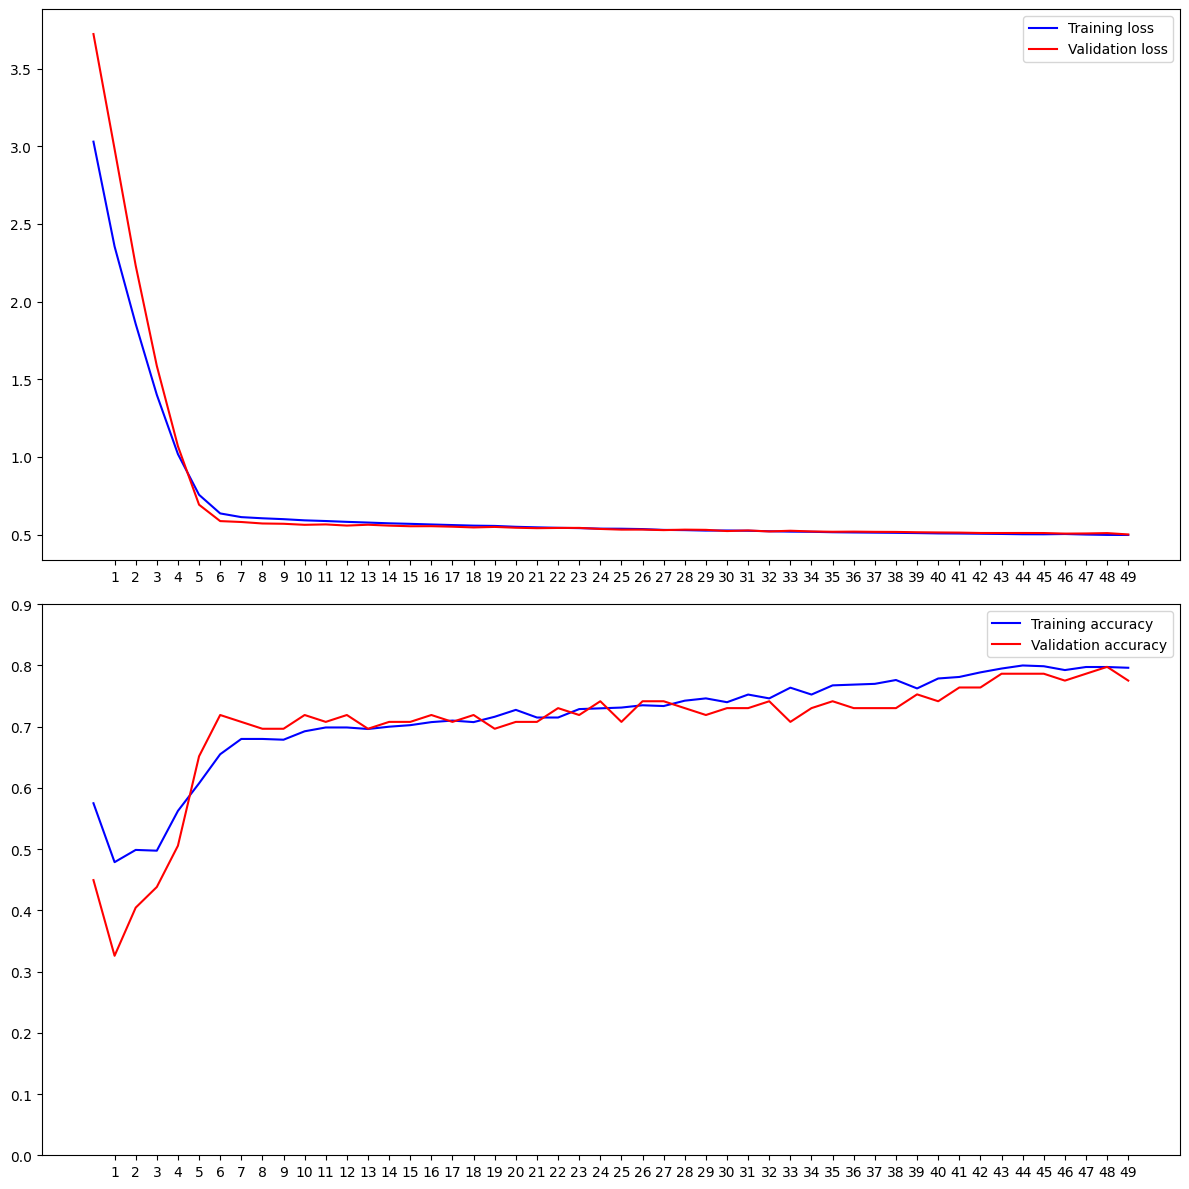

In [76]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(train.history['loss'], color='b', label="Training loss")
ax1.plot(train.history['val_loss'], color='r', label="Validation loss")
ax1.legend()
ax1.set_xticks(np.arange(1, epochs, 1))

ax2.plot(train.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(train.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.legend()
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

plt.tight_layout()
plt.show()

Test the model against validation data

In [77]:
(model.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 0s 0s/step


array([[1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [66]:
from sklearn.metrics import classification_report

Y_train_predicted = (model.predict(X_train) > 0.5).astype("int32")
print(classification_report(Y_train, Y_train_predicted, labels=[1], target_names=["Survivor"]))

Y_test_predicted = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(Y_test, Y_test_predicted, labels=[1], target_names=["Survivor"]))

25/25 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

    Survivor       0.73      0.32      0.44       304

   micro avg       0.73      0.32      0.44       304
   macro avg       0.73      0.32      0.44       304
weighted avg       0.73      0.32      0.44       304

3/3 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    Survivor       0.91      0.28      0.43        36

   micro avg       0.91      0.28      0.43        36
   macro avg       0.91      0.28      0.43        36
weighted avg       0.91      0.28      0.43        36



In [67]:
Y_test.iloc[0:10]

670    1.0
100    0.0
654    0.0
454    0.0
36     1.0
601    0.0
141    1.0
548    0.0
319    1.0
250    0.0
Name: Survived, dtype: float32

In [68]:
(model.predict(X_test.iloc[0:10]) > 0.5).astype(int)

1/1 [==============================] - 0s 12ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])